# Работа  
Использован датасет heart.csv https://www.kaggle.com/ronitf/heart-disease-uci  

In [1]:
import streamlit as st
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from io import StringIO 
from IPython.display import Image
import graphviz 
import pydotplus
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import numpy as np
from catboost import Pool, CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

## Разведочный анализ данных

In [2]:
data = pd.read_csv('heart.csv', sep=',')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
print(f"колонок: {data.shape[1]}, рядов {data.shape[0]}")
data.dtypes

колонок: 14, рядов 303


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2021-05-30 21:11:41.892 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-05-30 21:11:41.893 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


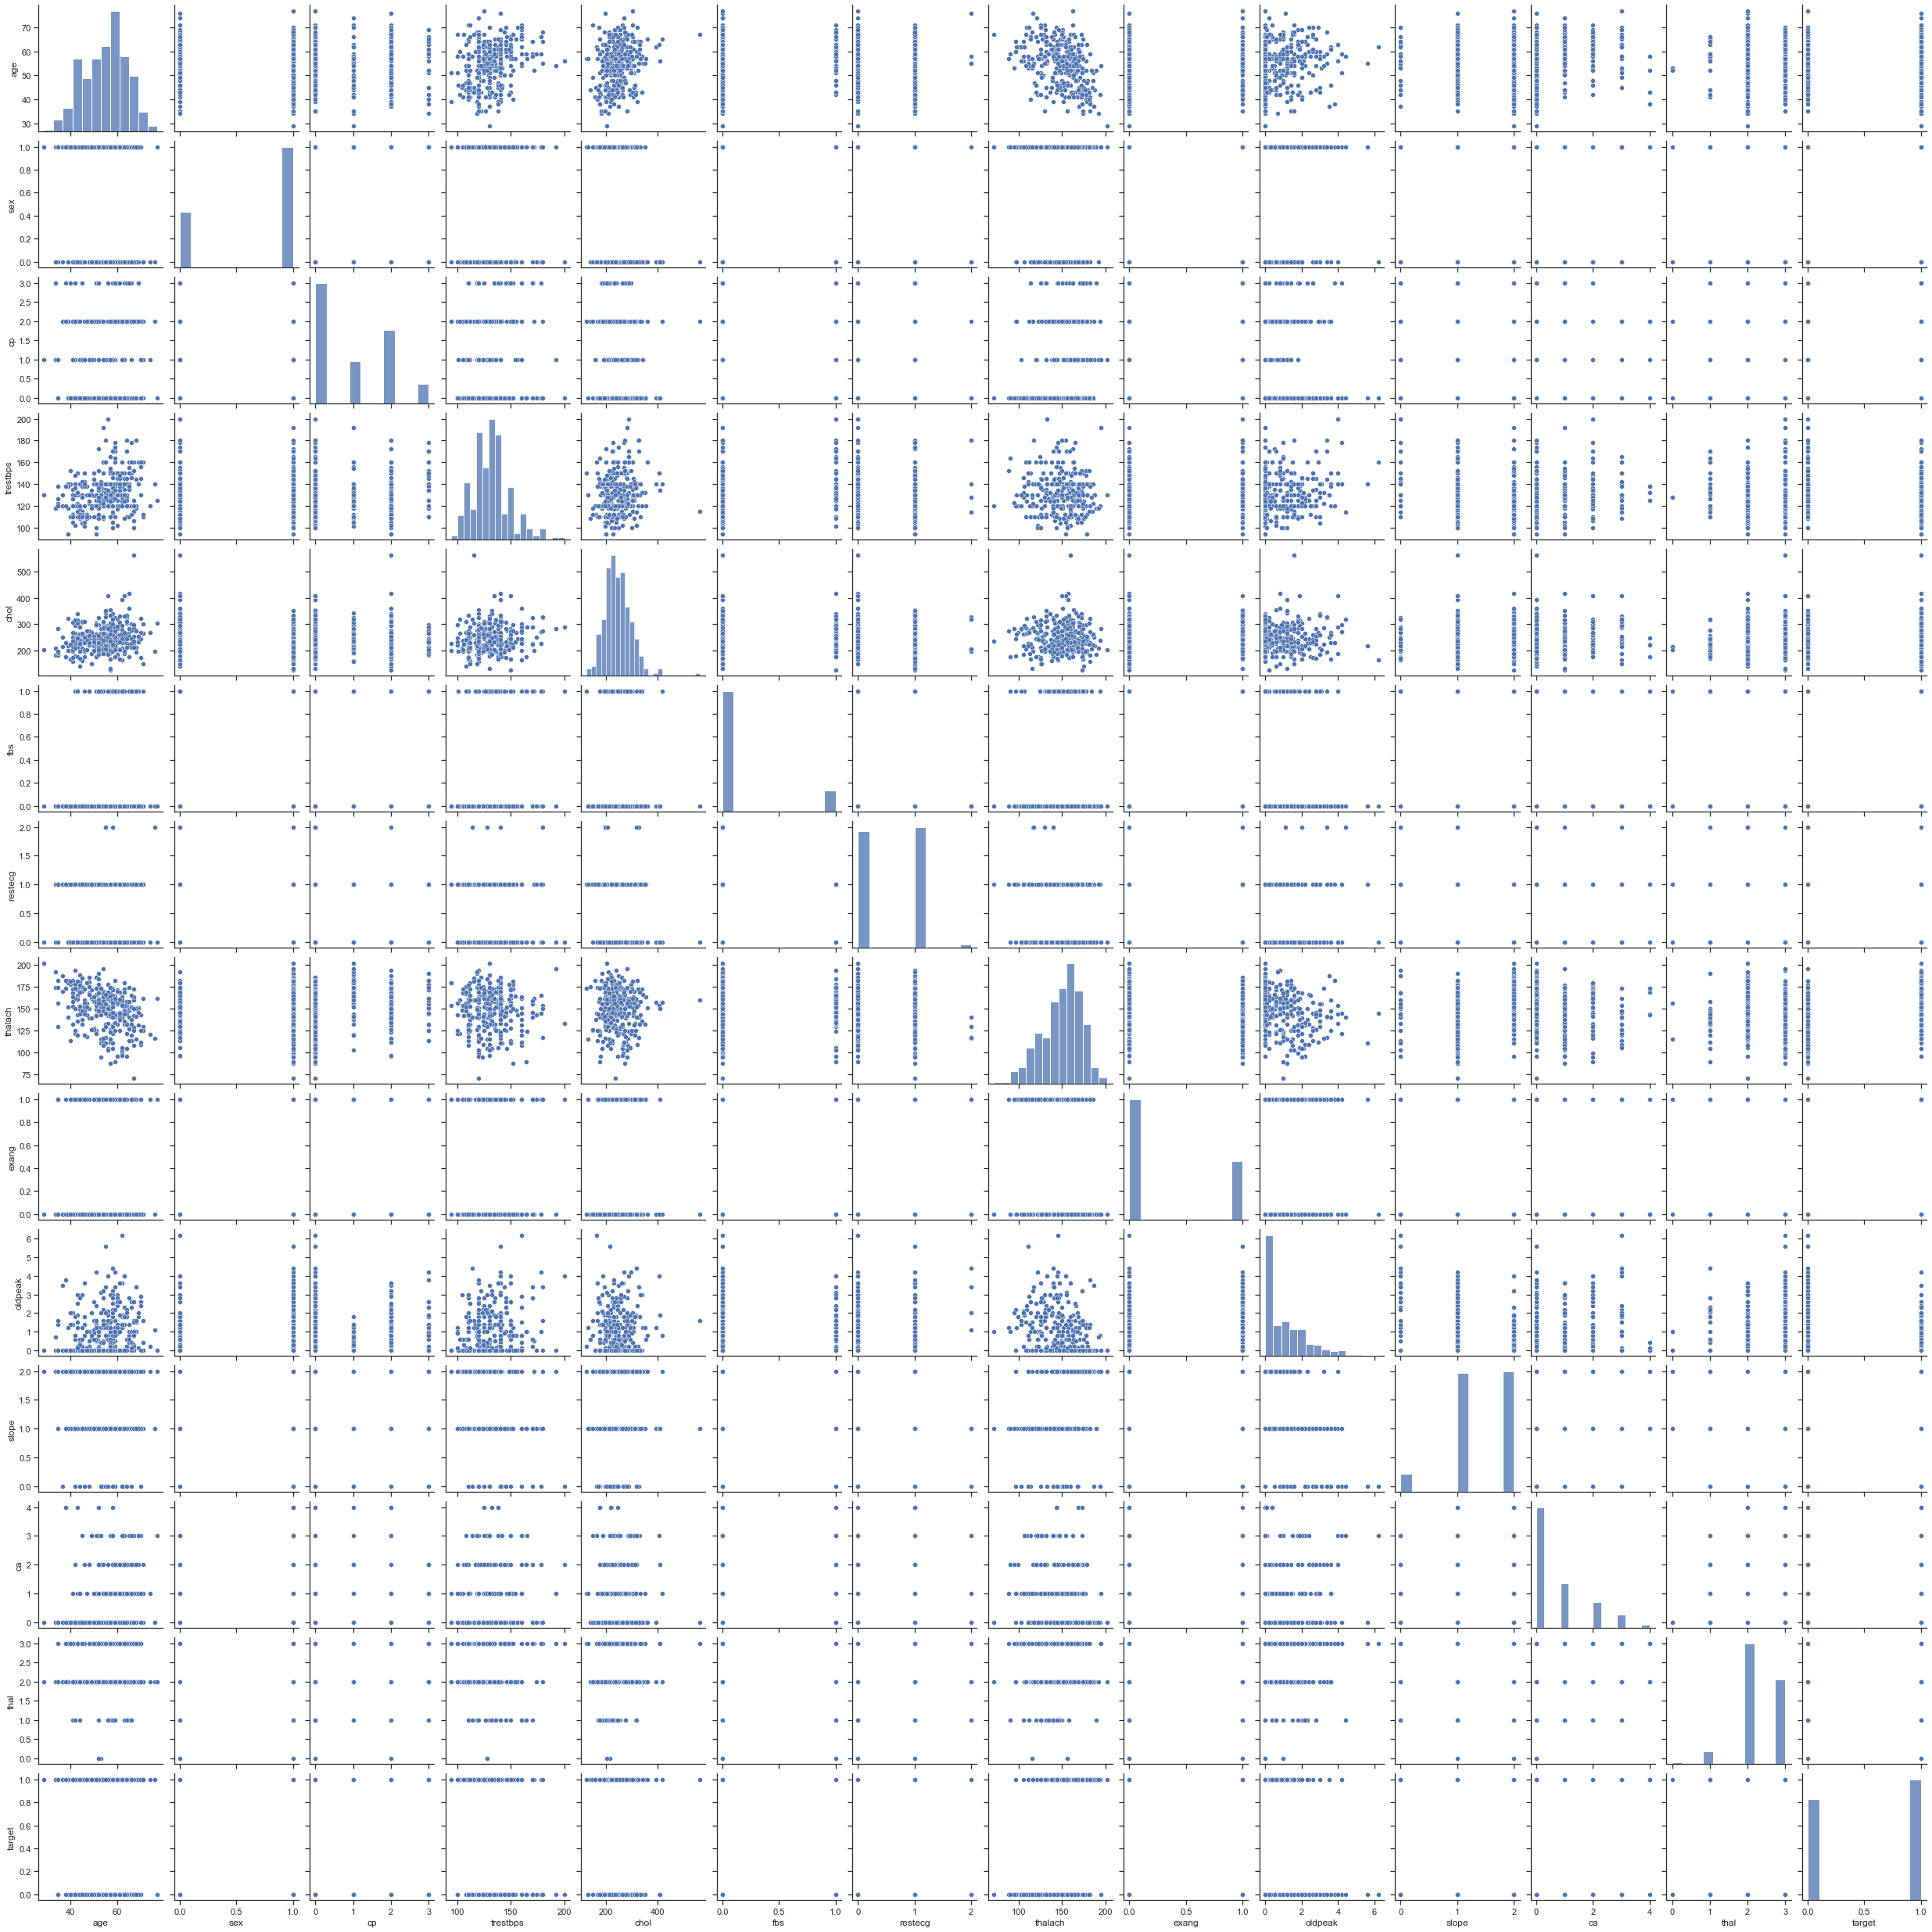

In [6]:
sns.pairplot(data)

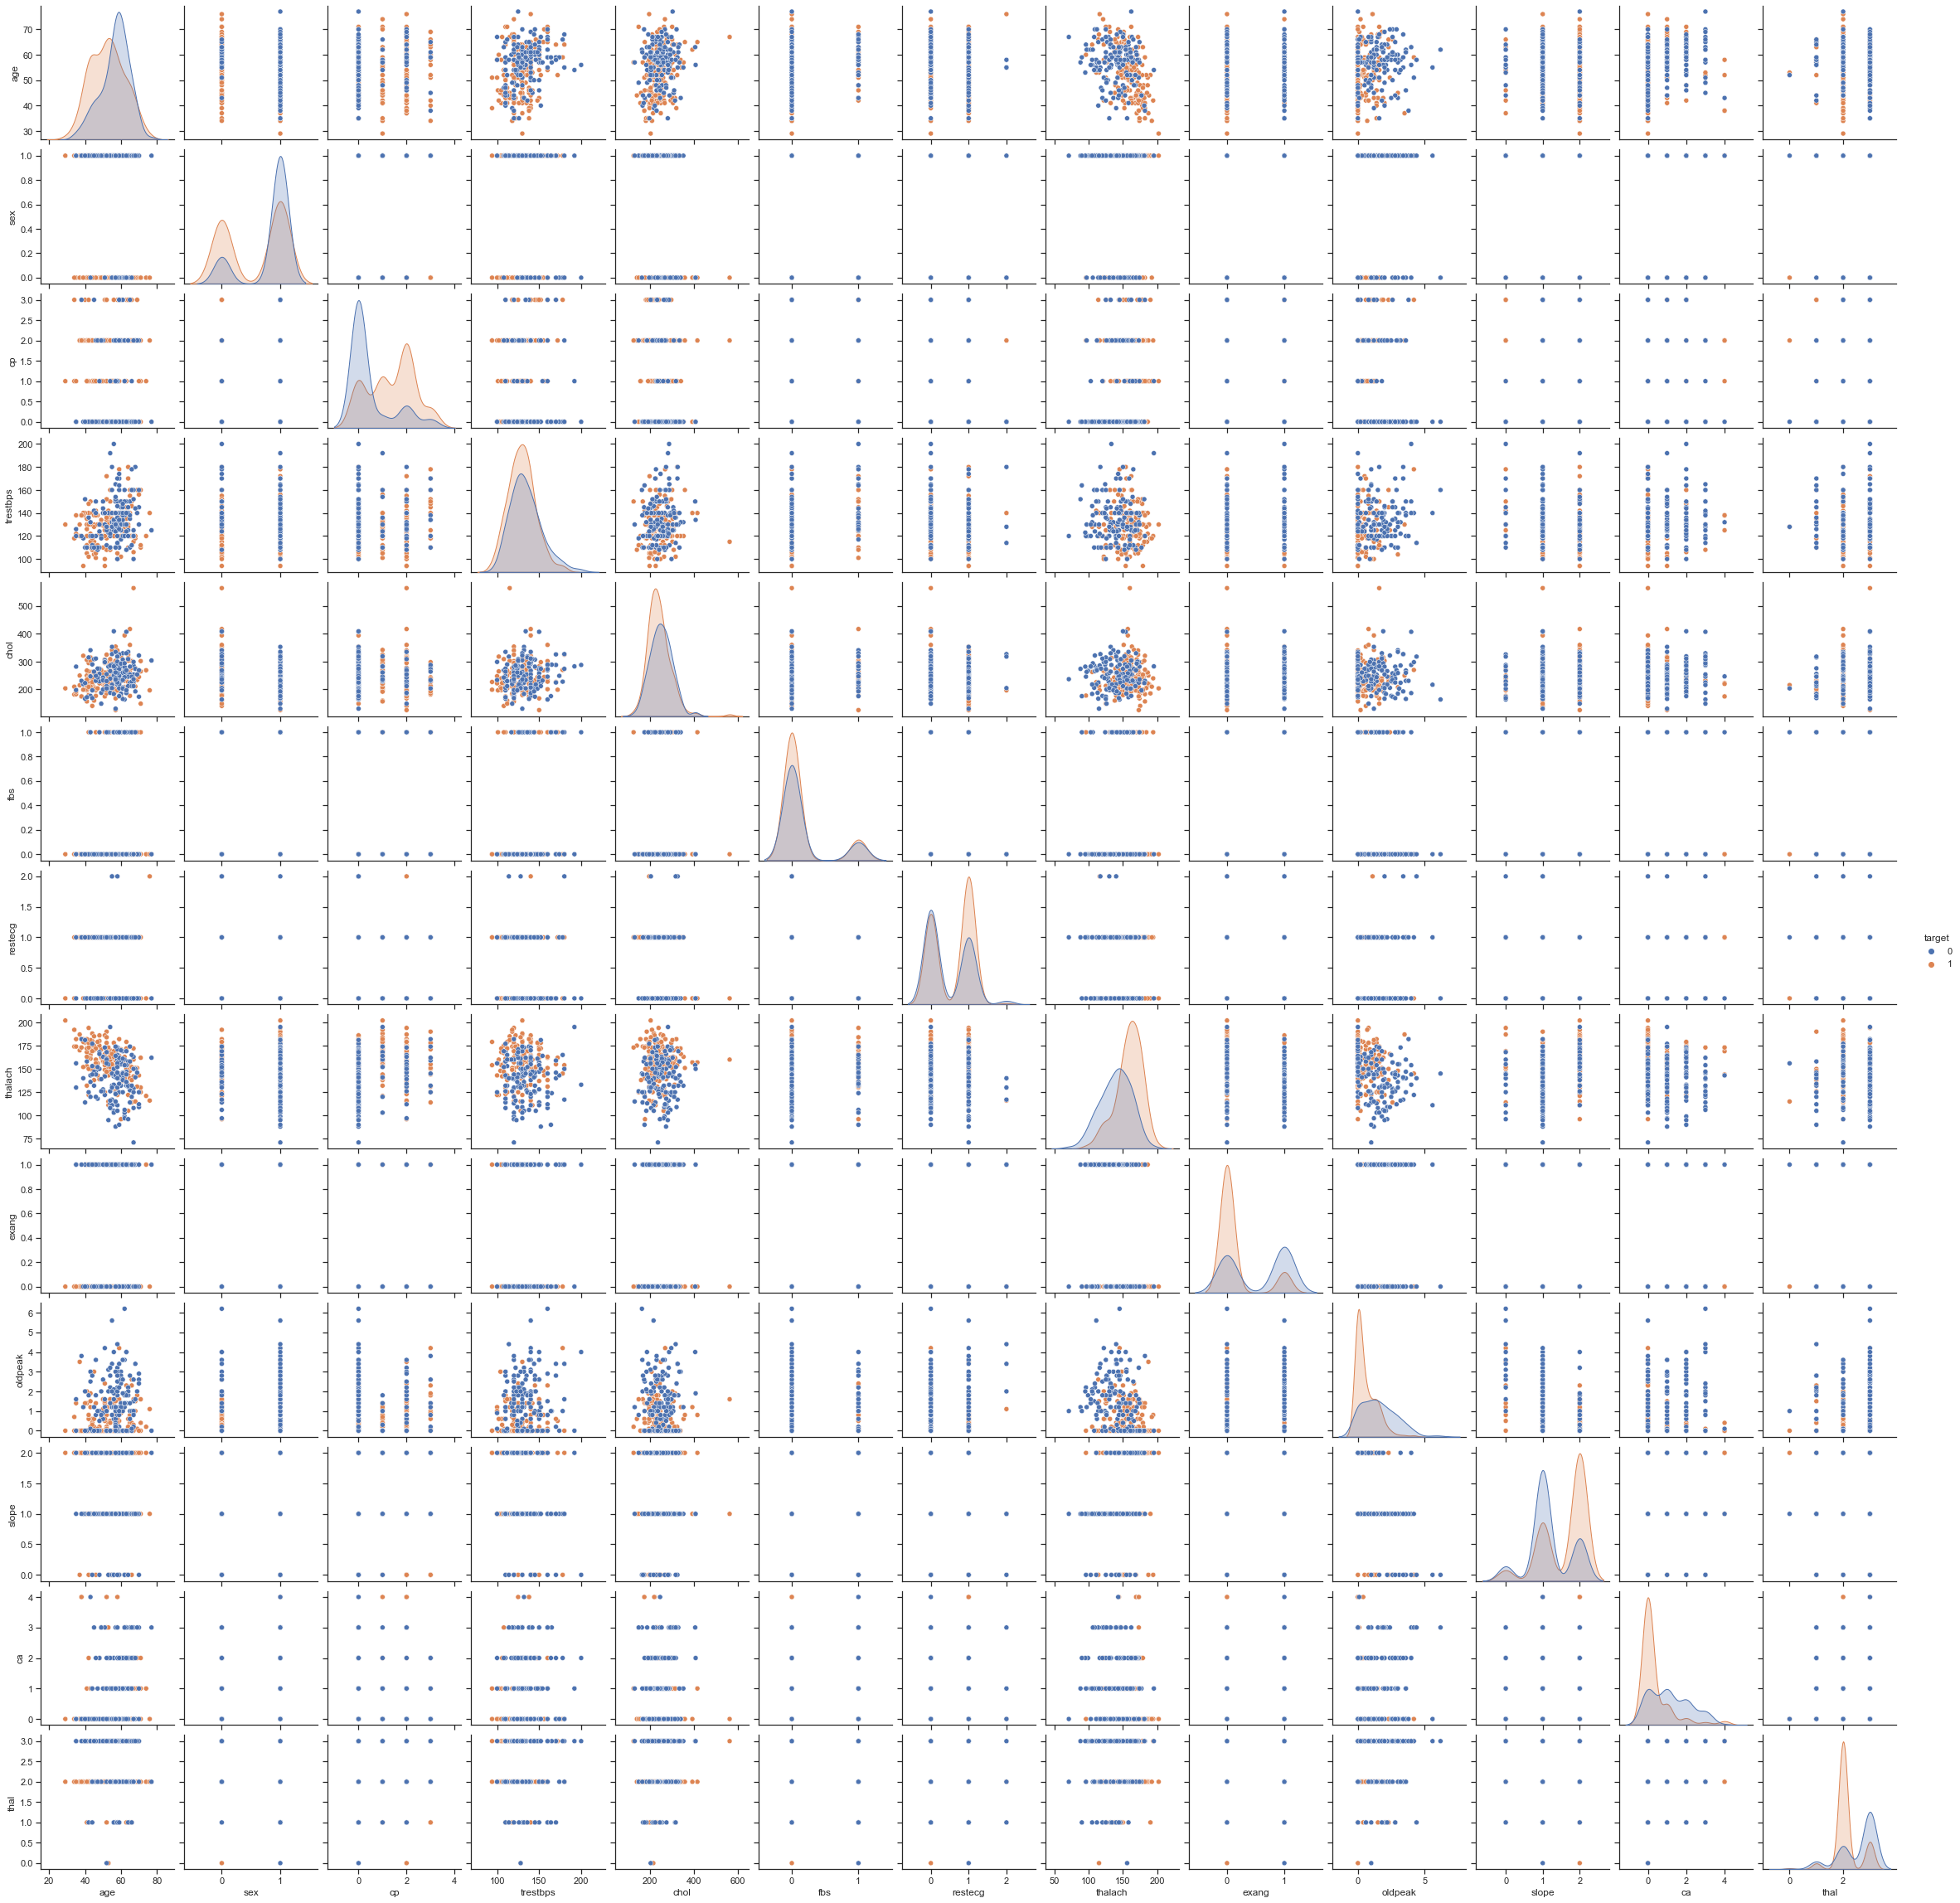

In [7]:
sns.pairplot(data, hue = "target")

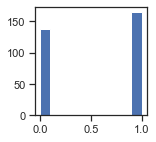

In [8]:
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['target'])
plt.show()

In [9]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Вывод: дизбаланс незначителен**

Скрипичные диаграммы

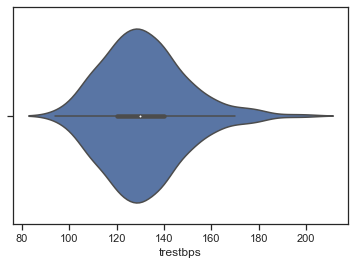

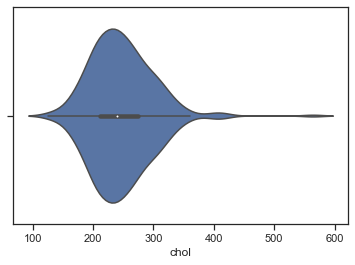

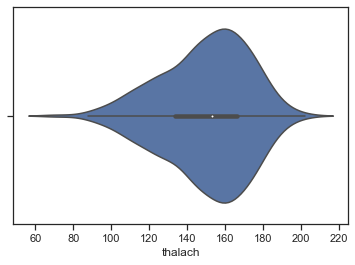

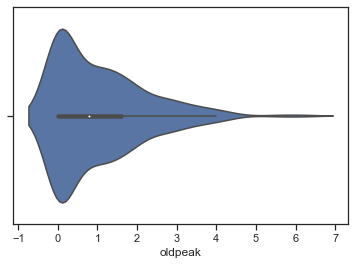

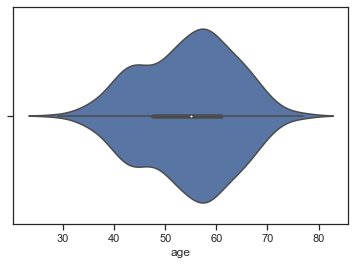

In [10]:
for col in ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']:
    sns.violinplot(x=data[col])
    plt.show()

## Работа с признаками

В даном датасете уже есть целевой признак - target, его и будем исследовать. Для построения модели необходимо скалировать числовые признаки:

In [11]:
scale_cols = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age'];
sc1 = MinMaxScaler()
data[scale_cols] = sc1.fit_transform(data[scale_cols])

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


## Корреляционный анализ

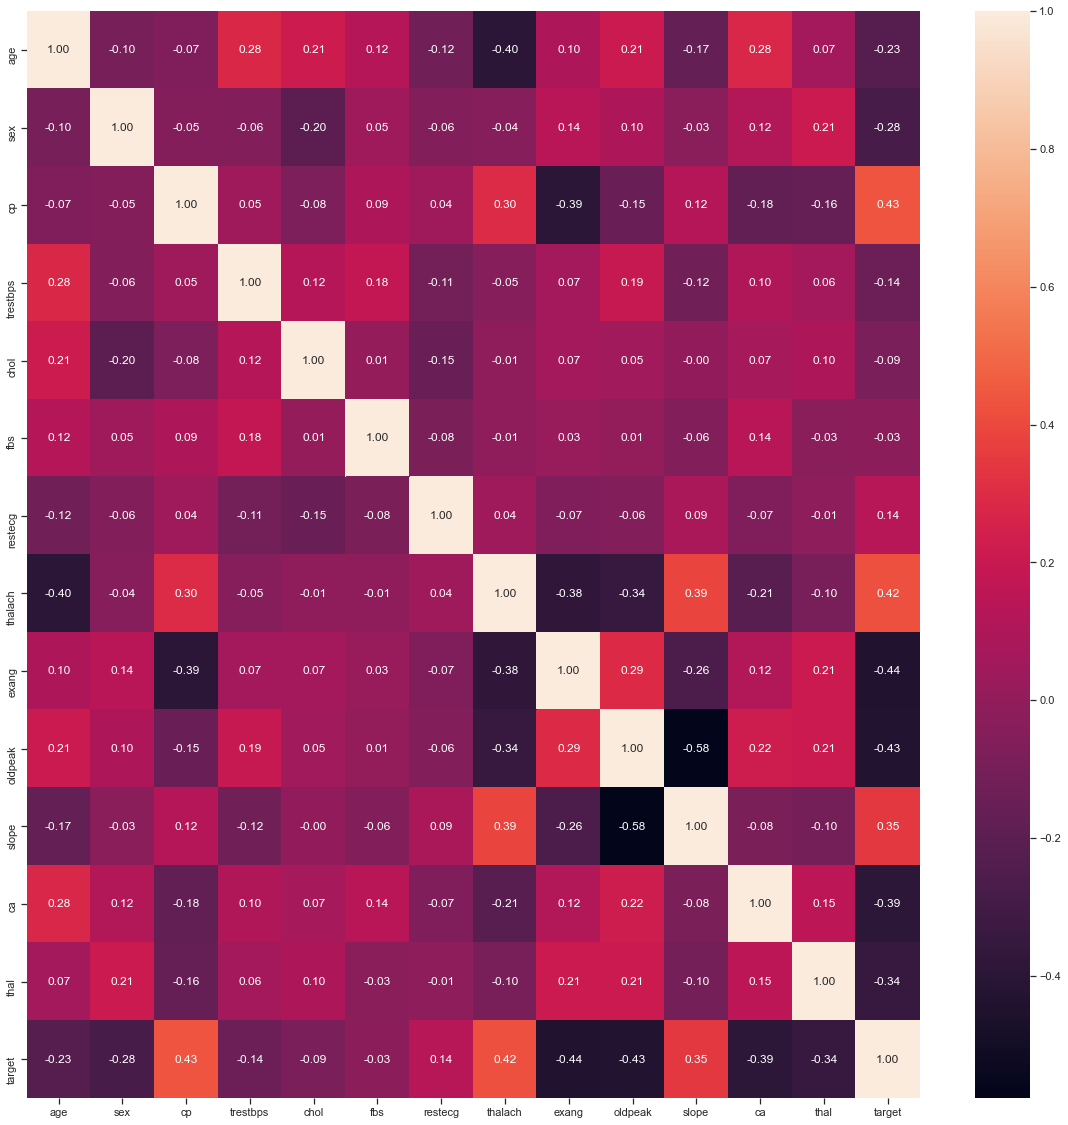

In [13]:
plt.figure(figsize=(20,20))
g = sns.heatmap(data.corr(), annot=True, fmt='.2f')

Как видно из корреляционного анализа, признак target наиболее сильно корелирует с признаками cp, thalach, exang, oldpeak.

Oldpeak сильно корклирует со slope, и хотя slope также имеет кореляцию с target, его предпочтительнее удалить

Модель неоптимальна для обучения, т.к. нет высоких коэффициэнтов корреляции, однако все еще пригодна.

In [14]:
data.drop(columns=['slope'], inplace = True)

## Анализ данных

Метрики были выбраны следующие :  
**precision:**  
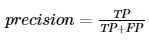  
из sklearn.metrics.precision_score  
Данная метрика отражает верность правильного предсказания 
  
**recall:**  
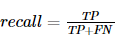  
из sklearn.metrics.recall_score 
Данная метрика выражает полноту правильных предсказаний  
  
**f1:**  
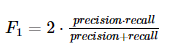  
из sklearn.metrics.f1_score  
Совмещает Precision и Recall  
  
**Area Under Curve**
Площадь под ROC-кривой  
из sklearn.roc_auc_score  
Данная метрика будет основной, мскольку стремится к уменьшению как FPR, так и FNR

In [15]:
TEST_SIZE = 0.3
RANDOM_STATE = 1
data_X = data.drop(columns=['target'])
data_Y = data['target']
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split \
(data_X, data_Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)
data_X_train.shape, data_X_test.shape, data_Y_train.shape, data_Y_test.shape

((212, 12), (91, 12), (212,), (91,))

## Обучение моделей

In [16]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()    

In [17]:
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [18]:
clasMetricLogger = MetricLogger()

In [19]:
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [20]:
def plot_learning_curve(data_X, data_y, clf, name='accuracy', scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(estimator=clf, scoring=scoring, X=data_X, y=data_y,
                                                            train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    fig = plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label=f'тренировочная {name}-мера')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label=f'проверочная {name}-мера')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Число тренировочных образцов')
    plt.ylabel(f'{name}-мера')
    plt.show()
    

In [21]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(data_X_train, data_Y_train)
    # Предсказание значений
    Y_pred = model.predict(data_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(data_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(data_Y_test.values, Y_pred)
    recall = recall_score(data_Y_test.values, Y_pred)
    f1 = f1_score(data_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(data_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(data_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, data_X_test, data_Y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)

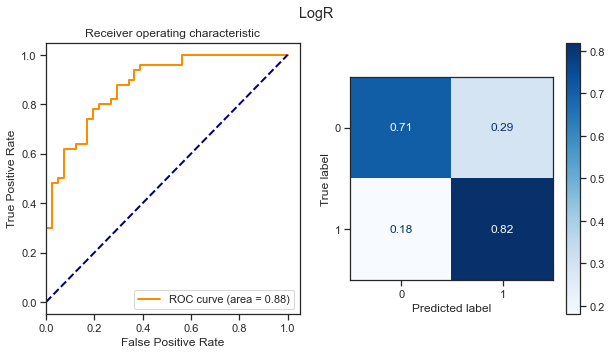

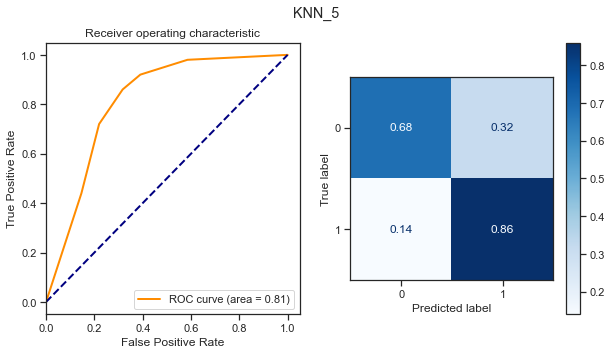

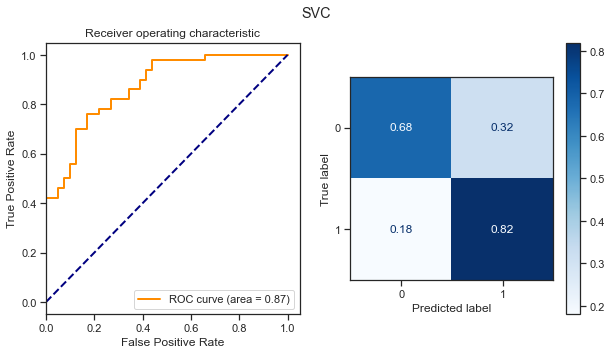

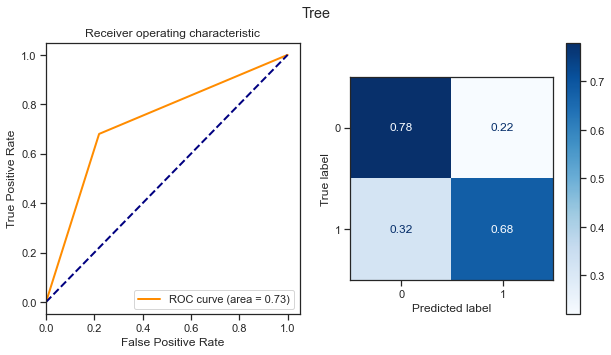

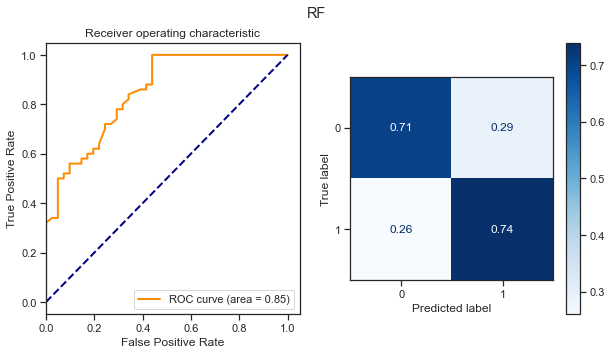

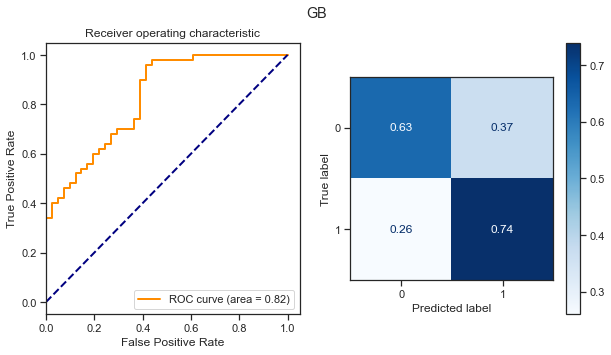

In [22]:
for model_name, model in clas_models.items():
    clas_train_model(model_name, model, clasMetricLogger)

precision
LogR


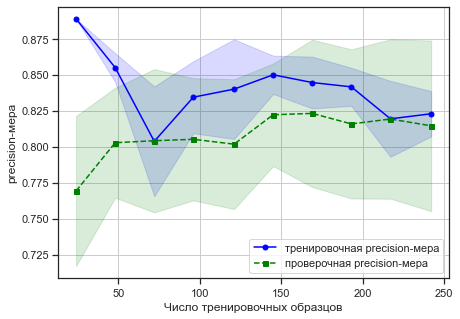

KNN_5


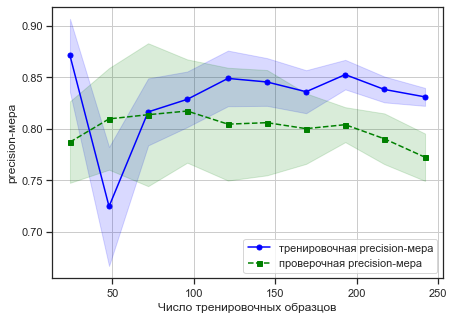

SVC


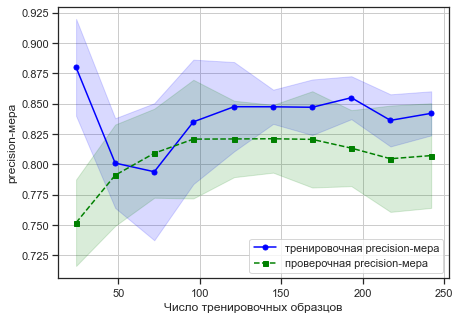

Tree


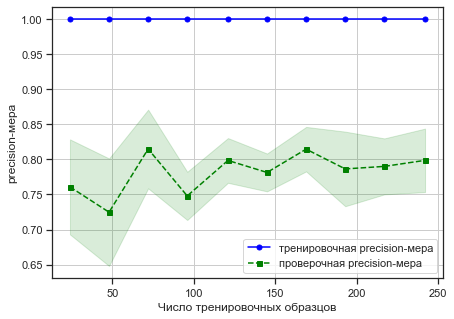

RF


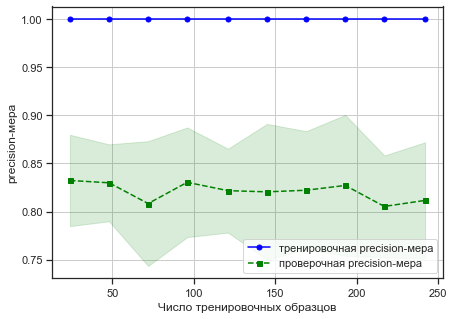

GB


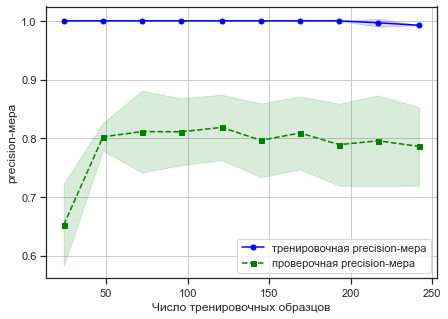

recall
LogR


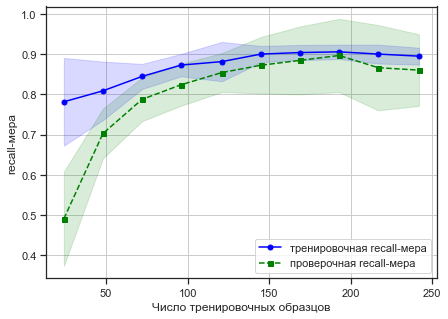

KNN_5


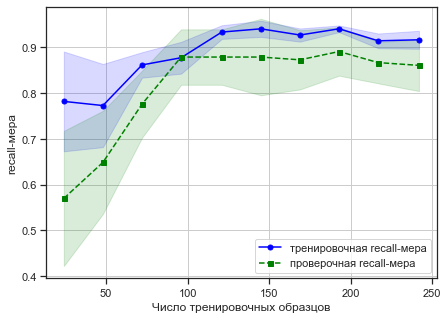

SVC


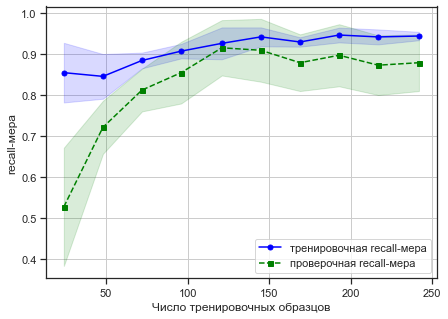

Tree


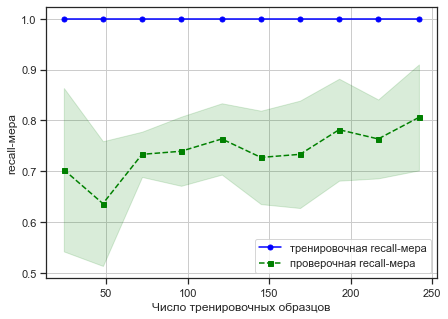

RF


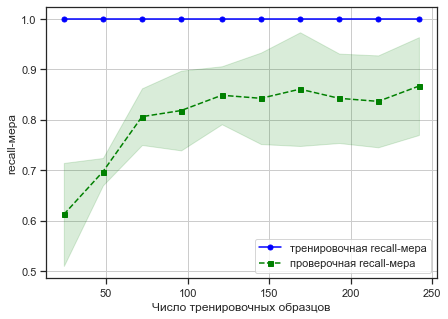

GB


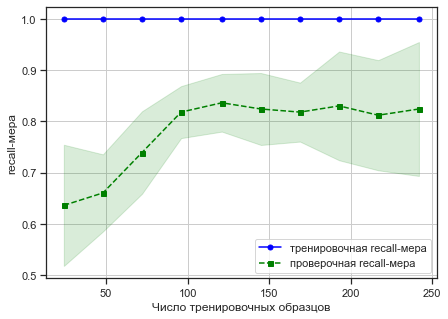

f1
LogR


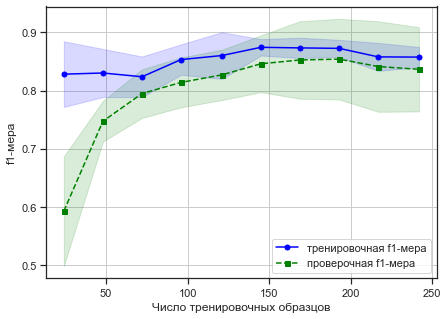

KNN_5


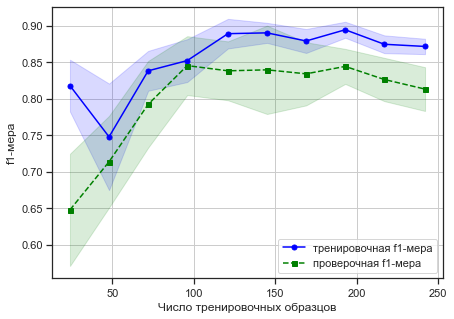

SVC


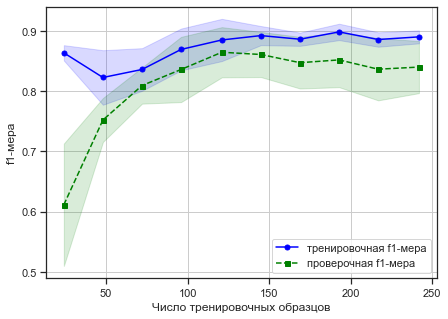

Tree


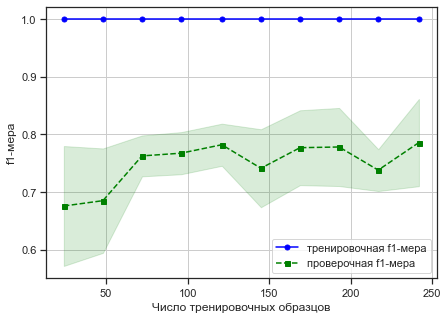

RF


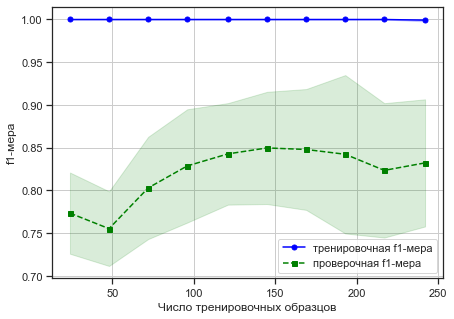

GB


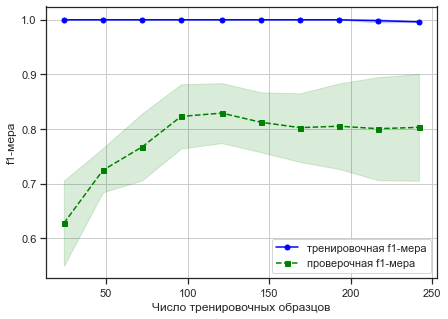

roc_auc
LogR


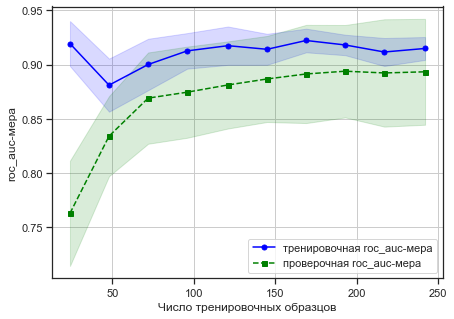

KNN_5


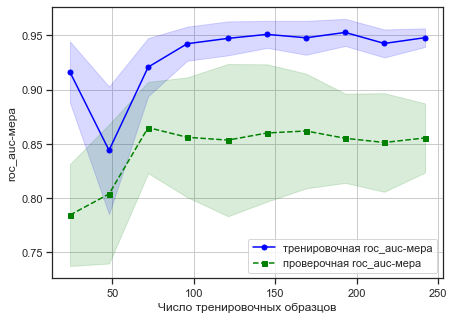

SVC


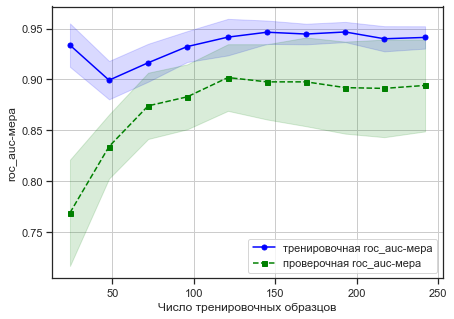

Tree


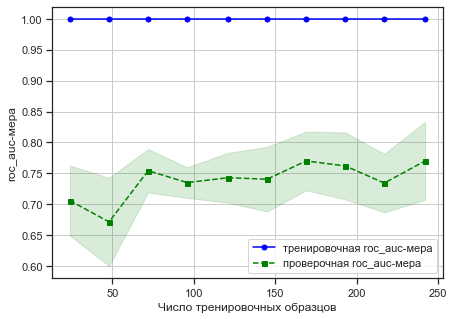

RF


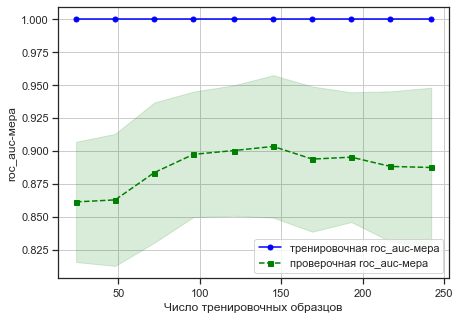

GB


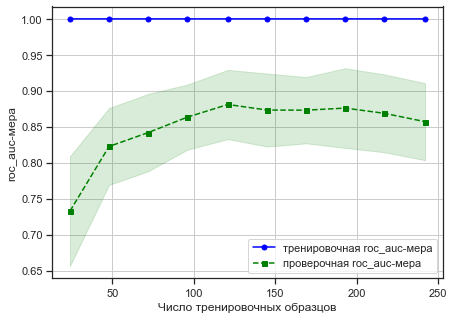

In [23]:
metrics = ['precision', 'recall', 'f1', 'roc_auc']
data_X = pd.concat([data_X_train, data_X_test])
data_Y = pd.concat([data_Y_train, data_Y_test])
for metric in metrics:
    print( "\033[1m" + metric + "\033[0m")
    for model_name, model in clas_models.items():
            print(model_name)
            model.fit(data_X_train, data_Y_train)
            plot_learning_curve(data_X, data_Y, model, name = metric, scoring = metric)

## Оптимизация

### KNN n_neighbours

In [24]:
n_range = np.array(range(1,170,20))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,  21,  41,  61,  81, 101, 121, 141, 161])}]

In [25]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(data_X_train, data_Y_train)

Wall time: 227 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([  1,  21,  41,  61,  81, 101, 121, 141, 161])}],
             scoring='roc_auc')

In [26]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=21)

In [27]:
clas_models_grid = {'KNN_5':KNeighborsClassifier(n_neighbors=5), 
                    str('KNN_' + str(clf_gs.best_params_['n_neighbors'])):clf_gs.best_estimator_}

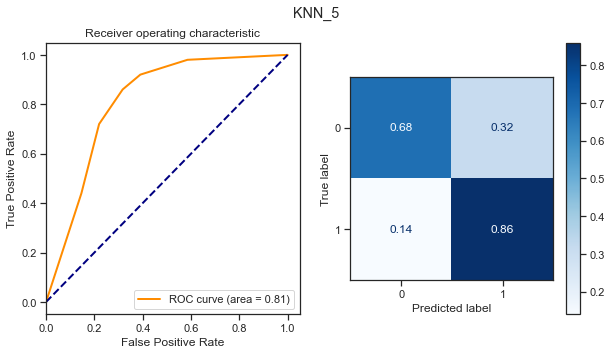

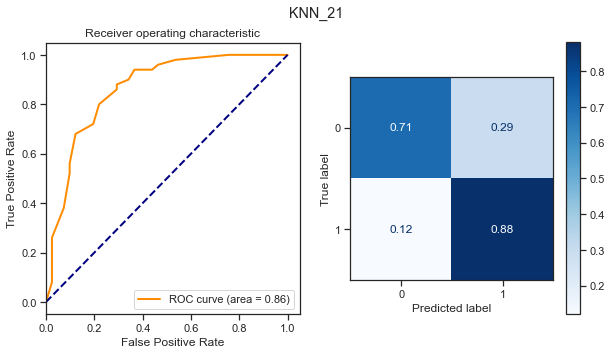

In [28]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

### Tree_max_depth

In [29]:
n_range = np.array(range(1,10,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [30]:
%%time
clf_gs = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(data_X_train, data_Y_train)

Wall time: 166 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
             scoring='roc_auc')

In [31]:
clf_gs.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [32]:
clas_models_grid = {'Tree':DecisionTreeClassifier(), 
                    str('Tree_' + str(clf_gs.best_params_['max_depth'])):clf_gs.best_estimator_}

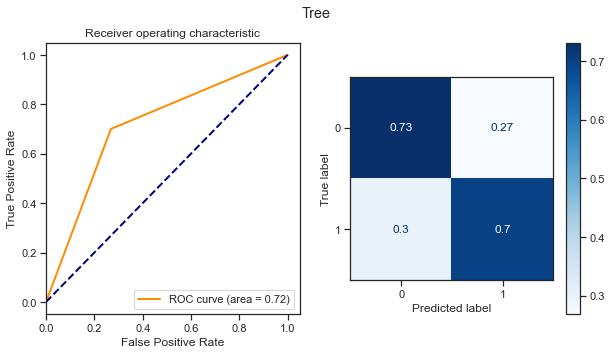

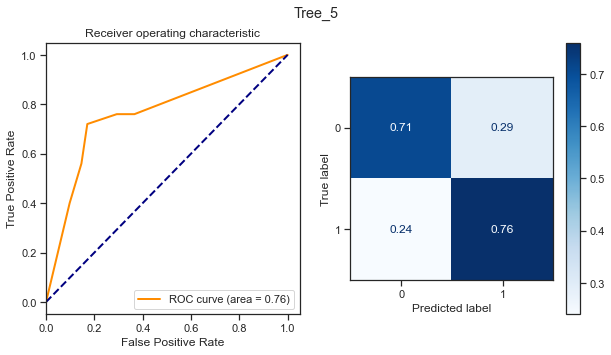

In [33]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

### SVC cores

In [34]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 'probability':[True]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'probability':[True]}]
tuned_parameters

[{'kernel': ['rbf'],
  'gamma': [0.001, 0.0001],
  'C': [1, 10, 100, 1000],
  'probability': [True]},
 {'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'probability': [True]}]

In [35]:
%%time
clf_gs = GridSearchCV(SVC(), tuned_parameters, cv=7, scoring='roc_auc')
clf_gs.fit(data_X_train, data_Y_train)

Wall time: 4.2 s


GridSearchCV(cv=7, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf'], 'probability': [True]},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear'],
                          'probability': [True]}],
             scoring='roc_auc')

In [36]:
clf_gs.best_estimator_

SVC(C=1000, gamma=0.001, probability=True)

In [37]:
clas_models_grid = {'SVC':SVC(probability=True), 
                    str('SVC_' + str(clf_gs.best_params_['kernel']) + "_" + str(clf_gs.best_params_['C'])):clf_gs.best_estimator_}

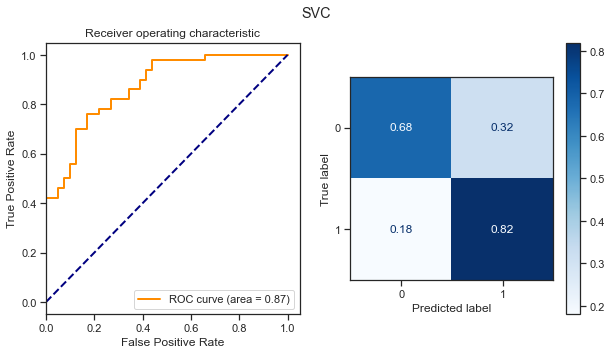

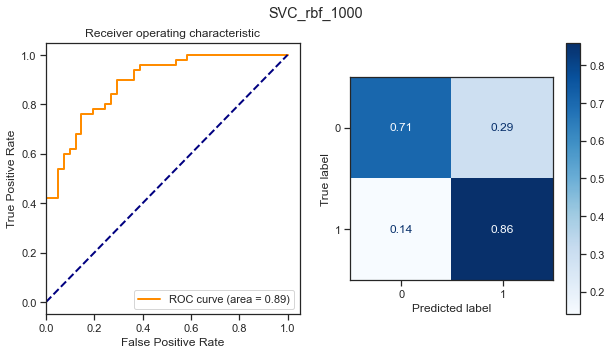

In [38]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## RandomForest n_estimators + max_depth

In [39]:
n_range = np.array(range(1,10,1))
n_est = np.array(range(1,251, 50))
tuned_parameters = [{'n_estimators': n_est, 'max_depth':n_range}]
tuned_parameters

[{'n_estimators': array([  1,  51, 101, 151, 201]),
  'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}]

In [40]:
%%time
clf_gs = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(data_X_train, data_Y_train)

Wall time: 23.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'n_estimators': array([  1,  51, 101, 151, 201])}],
             scoring='roc_auc')

In [41]:
clf_gs.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=101)

In [42]:
clas_models_grid = {'RF':RandomForestClassifier(), 
                    str('RF_' + str(clf_gs.best_params_['n_estimators']) + "_" + str(clf_gs.best_params_['max_depth'])):clf_gs.best_estimator_}

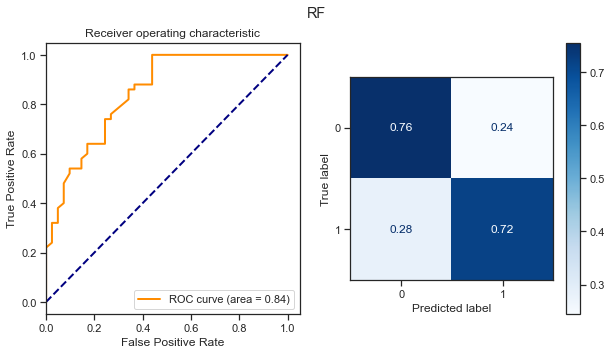

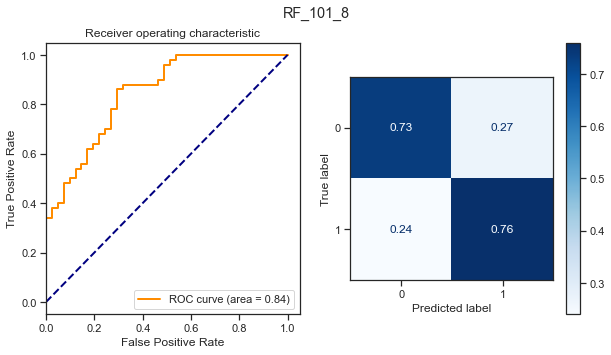

In [43]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## GradientBoost 

In [44]:
tuned_parameters = [{
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100]
    }]
tuned_parameters


[{'loss': ['deviance'],
  'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
  'max_depth': [3, 5, 8],
  'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
  'n_estimators': [100]}]

In [45]:
%%time
clf_gs = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(data_X_train, data_Y_train)

Wall time: 1min 14s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                            0.2],
                          'loss': ['deviance'], 'max_depth': [3, 5, 8],
                          'n_estimators': [100],
                          'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95,
                                        1.0]}],
             scoring='roc_auc')

In [46]:
clf_gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.025, subsample=0.85)

In [47]:
clas_models_grid = {'GB':GradientBoostingClassifier(), 
                    str('GB_' + str(clf_gs.best_params_['learning_rate']) + "_" + str(clf_gs.best_params_['max_depth'])+'_'\
                    + str(clf_gs.best_params_['subsample'])+ "_" + str(clf_gs.best_params_['n_estimators'])):clf_gs.best_estimator_}

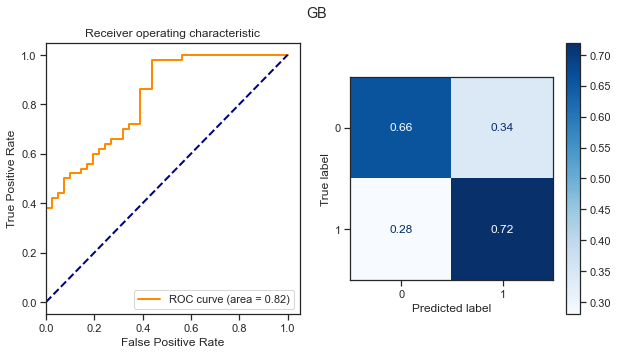

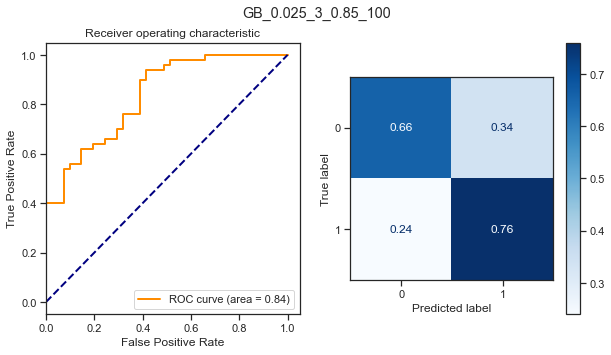

In [48]:
for model_name, model in clas_models_grid.items():
    clas_train_model(model_name, model, clasMetricLogger)

## Метрики итога

In [49]:
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

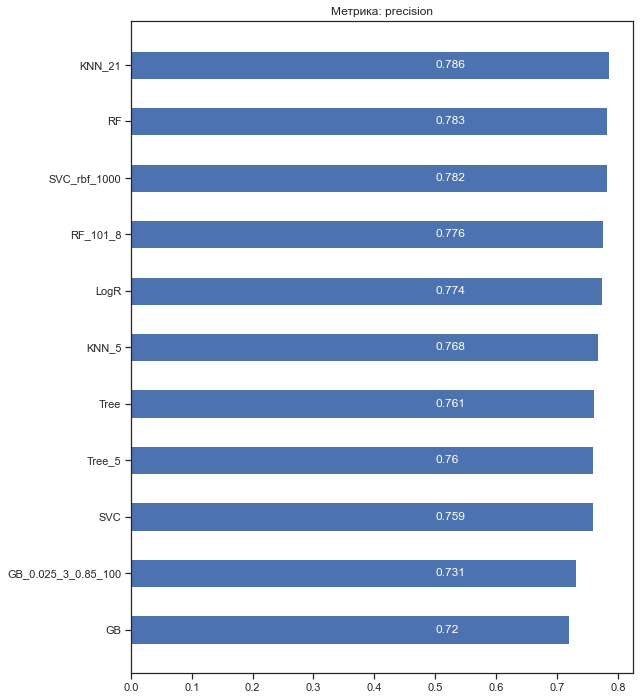

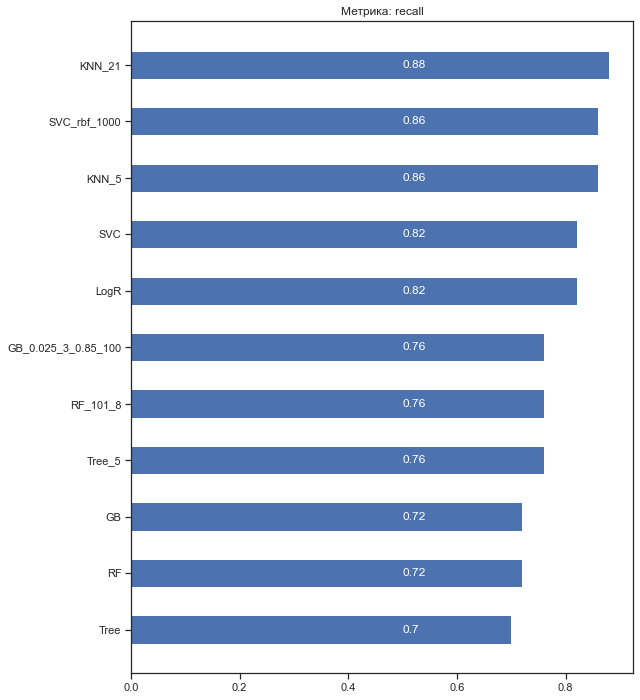

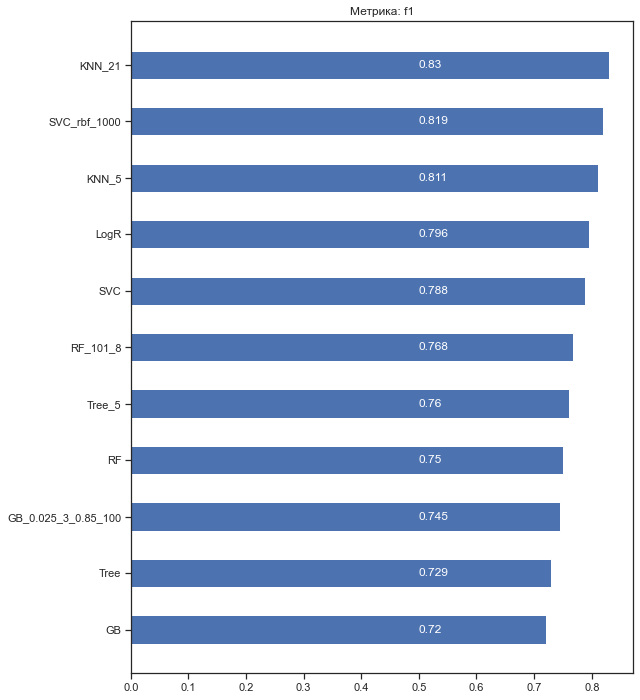

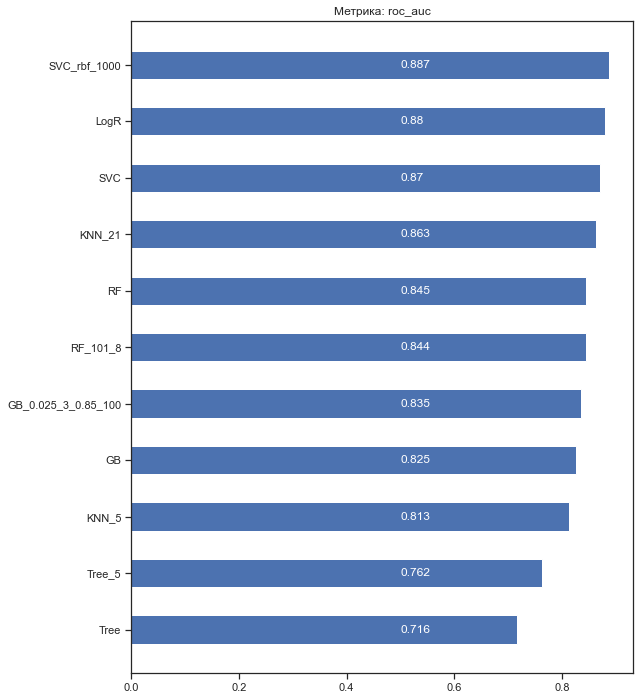

In [50]:
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(9, 12))

# Итог

Лучшими моделями стали:  
  
|   Метрика   |    Название    |   Значение   |  
|:-----------:|:--------------:|:------------:|  
|  precision  |      Tree      |     0.791    |  
|    recall   |     KNN_21     |      0.88    |  
|      f1     |     KNN_21     |      0.83    |  
|   roc_auc   |  SVC_rbf_1000  |     0.087    |